## Importing libraries

In [3]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import config
import pprint
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
from random import randrange
from IPython.display import IFrame

#### Create Model

In [4]:
# training model and calibrating scaler
# loading data
df1 = pd.read_csv("df.csv", sep=";")
df2 = pd.read_csv("df2.csv", sep=";")
df3 = pd.read_csv("df3.csv", sep=";")
dfTop100 = pd.read_csv("dfTop100.csv", sep=";")

# concatenating data
dfsList = [df1,df2,df3]
dfs = pd.concat(dfsList, axis=0, join="inner").reset_index(drop = True)
dfs = dfs.drop("Unnamed: 0", axis=1)

# create training dataframe
X = dfs.iloc[:,0:9]

# calibrate the scaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)

# Create KMeans model
kmeans = KMeans(n_clusters=85, random_state=1234)
kmeans.fit(X_scaled_df)

# Extract Labels
labels = kmeans.labels_ # used to get labels of training data 

# add cluster labels to data frame
clusters = kmeans.predict(X_scaled_df)
pd.Series(clusters).value_counts().sort_index()
dfs["cluster"] = clusters


In [71]:
dfTop100.head(3)

,0
0,Last Night Morgan Wallen
1,Fast Car Luke Combs
2,Calm Down Rema & Selena Gomez


In [ ]:
songData = sp.search(q=val, limit=5)

In [7]:
type(dfTop100)
dfTop100.head(3)
dfTop100["0"]

0                          Last Night Morgan Wallen
1                               Fast Car Luke Combs
2                     Calm Down Rema & Selena Gomez
3                               Flowers Miley Cyrus
4            All My Life Lil Durk Featuring J. Cole
                          ...                      
95                                Jaded Miley Cyrus
96    Abracadabra Young Thug Featuring Travis Scott
97                                  Truck Bed HARDY
98            Save Me Jelly Roll With Lainey Wilson
99                     Gucci Grocery Bag Young Thug
Name: 0, Length: 100, dtype: object

In [58]:
def song_recommender():
    sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))
    # ask for user input
    val = input("enter song and/or artist name: ")

    # check whether song is contained in Top 100
    result = dfTop100[dfTop100['0'].str.contains(val)]['0'].values

    best_matches = process.extract(input_string, column_strings, scorer=fuzz.ratio, limit=3)

    # Display the result
    if len(result) > 0:
        print('Song is present in the Top 100')
        print('Recommending random song out of Top 100')
        val = dfTop100.iloc[randrange(0,100),][0]
        # search for song
        songData = sp.search(q=val, limit=5)
        # get song ID
        songID = songData['tracks']['items'][0]['id']
        
        # play track
        return IFrame(src="https://open.spotify.com/embed/track/"+songID,
               width="480",
               height="180",
               frameborder="0",
               allowtransparency="true",
               allow="encrypted-media",
              )
    else:
        print('Song is not Present in the Top 100')
        print('Recommending according to Spotify features')
    
        # search for song
        songData = sp.search(q=val, limit=5)

        # get song ID
        songID = songData['tracks']['items'][0]['id']

        # get features
        songFeatures = sp.audio_features(songID)

        # create dataframe out of list of song features
        songFeaturesdf=pd.DataFrame(songFeatures)  
        songFeaturesdf=songFeaturesdf[["danceability","energy","loudness","speechiness","acousticness",
            "instrumentalness","liveness","valence","tempo","id","duration_ms"]]

        # use only selected song features
        songFeatures1 = songFeaturesdf.iloc[:,0:9]

        # scale features of recommended song 
        X_scaled = scaler.transform(songFeatures1)
        X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)

        # predict target cluster
        targetCluster = kmeans.predict(X_scaled_df)[0]

        # filter dataframe for target cluster
        dfSelected = dfs.loc[dfs["cluster"] == targetCluster]

        # select random track from filtered dataframe
        recommendationID = dfSelected.iloc[randrange(0,len(dfSelected))]["id"]

         


        # play track
        return IFrame(src="https://open.spotify.com/embed/track/"+recommendationID,
               width="480",
               height="180",
               frameborder="0",
               allowtransparency="true",
               allow="encrypted-media",
              )

In [62]:
song_recommender()



enter song and/or artist name: daft punk
Song is not Present in the Top 100
Recommending according to Spotify features


In [ ]:
fuzzywuzzy
difflib

<b> advanced (optional)

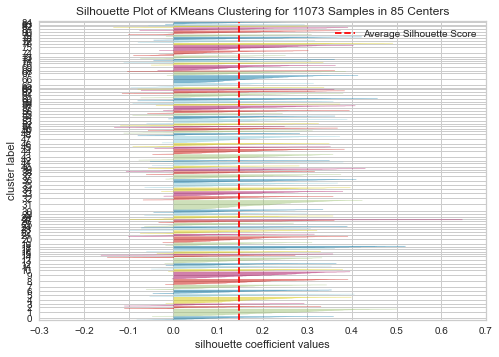

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 11073 Samples in 85 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [67]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(85, random_state=1234)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Here, we confirm that 3 is the best option, but we also notice that 5 a quite good - it meets the 'technical criteria' of having a better score than its predecessor (4), so if it falls within the range of our business demands - it looks like the best candidate.

# Saving with pickle

In [35]:
import pickle

#scaler = StandardScaler()
#model = KMeans()

with open("Model/scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("Model/kmeans_4.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [ ]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 


In [ ]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!")

In [ ]:
scaler= load(filename="Model/scaler.pickle")

In [ ]:
kmeans_model = load(filename="Model/kmeans_4.pickle")

In [ ]:
kmeans_model

In [ ]:
scaler2 = load("Model/scaler.pickle")

In [ ]:
# user input a song
## get the audio features for the song from spotify 
## scale the audio features with scaler that you build the Kmean on 
## predict for the user song(audio features) in which cluster belong to (e.g belongs to 7 )
## got the 100,000000 database and recommed a song that belong to the same cluster of the user input song 

# Time to work!

Time to clusterize the songs in your database and see how they look like. 